# Author: Jagjeet Singh

## TASK: 4

## Create the Decision Tree classifier and visualize it graphically.

### importing necessary libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

### getting the dataset

In [3]:
df=sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### checking null values

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### checking data types and statistical summary of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### unique species

In [8]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### storing independent columns in x and dependent variable or target variable in y

In [9]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

### encoding the species to numerical data

In [10]:
le=LabelEncoder()
le.fit(y)
y=le.transform(y)

### splitting data into training and testing data

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### creating object of decision tree classifier and traing the data on model 

In [18]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

### checking score of model

In [19]:
model.score(x_test,y_test)

0.9777777777777777

### printing confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [25]:
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

### getting the classification report

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### decoding the prediction to species

In [27]:
le.inverse_transform(y_pred)

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

### plotting the decision tree

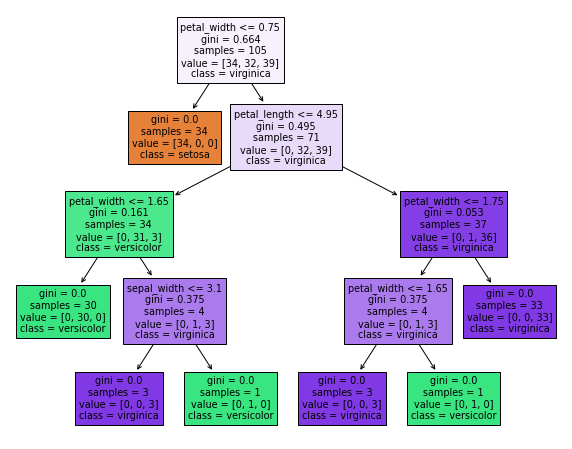

In [28]:
plt.figure(figsize=(10,8))
plot_tree(model,feature_names=df.iloc[:,:-1].columns,class_names=df['species'].unique(),filled=True)
plt.show()

### hyper training parameters of decession tree using grid search CV

In [24]:
param={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,8,10,20,30,40,50,None]}
clf=RandomizedSearchCV(DecisionTreeClassifier(),param,cv=5)

In [30]:
clf.fit(x,y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 8, 10, 20, 30, 40, 50,
                                                      None],
                                        'splitter': ['best', 'random']})

### score of model and best parameters

In [31]:
clf.best_score_

0.9800000000000001

In [32]:
clf.best_params_

{'splitter': 'random', 'max_depth': 20, 'criterion': 'gini'}

In [47]:
model=DecisionTreeClassifier(splitter='random', max_depth=20, criterion='gini')

In [48]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20, splitter='random')

In [49]:
pred=model.predict(x_test)

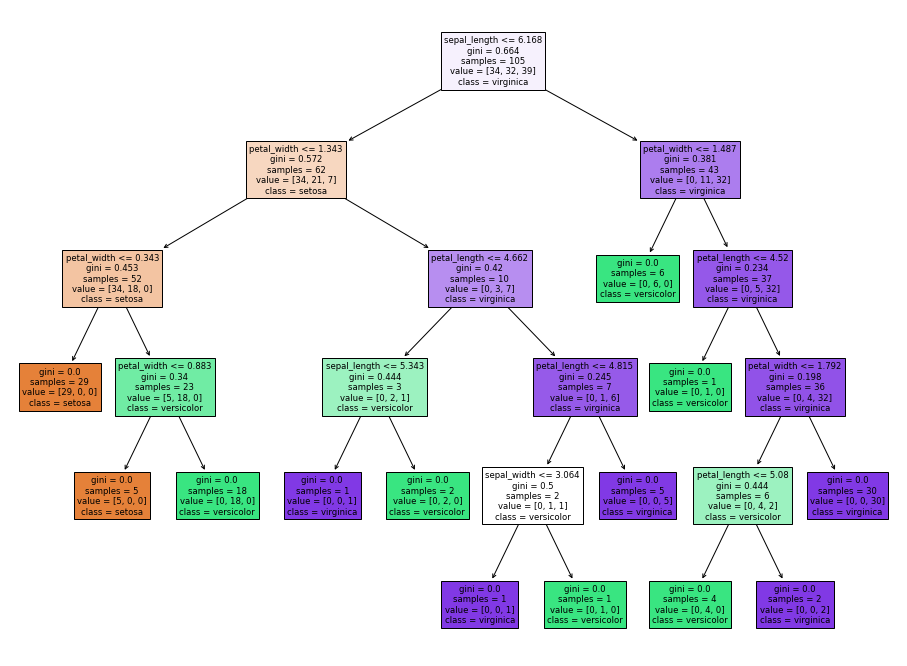

In [50]:
plt.figure(figsize=(16,12))
plot_tree(model,feature_names=df.iloc[:,:-1].columns,class_names=df['species'].unique(),filled=True)
plt.show()

In [51]:
le.inverse_transform(pred)

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa'],
      dtype=object)

### again checking the confusion matrix and classification report

In [52]:
cm=confusion_matrix(y_test,pred)
cm

array([[16,  0,  0],
       [ 0, 15,  3],
       [ 0,  0, 11]], dtype=int64)

In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.83      0.91        18
           2       0.79      1.00      0.88        11

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45

